In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost
warnings.filterwarnings('ignore')


In [53]:
df = pd.read_csv('Data\Accident_data.csv')


In [54]:
#Formatter
pd.options.display.float_format = '{:.2f}'.format

Data Preprocessing

In [55]:
#Initializing Functions

#Unique Value and Value Counts
def unique_value_count(df):
    for i in df:
        print('_'*24)
        print(df[i].value_counts())
        print(df[i].unique())
        print('='*24)
        print('')

#Null Values and Percentage
def Na(df):
    for i in df:
            print('_'*24)
            nan = df[i].isnull().sum()
            print(nan,f"- Null Values of {i}")
            print(f'The Null Percentage of {i} is {(nan/len(df))*100:.2f}%')
            print('='*24)
            print('')

#Ordinal Encoder Function
from sklearn.preprocessing import OrdinalEncoder
def OD_Encoder(df,column,category):
    ord_encoder = OrdinalEncoder(categories=[category])
    df[column] = ord_encoder.fit_transform(df[[column]])
    return df      
#OHE Encoder Function
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output= False).set_output(transform='pandas')      

   

In [56]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.52,Darkness - lighting unknown,Kensington and Chelsea,-0.21,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.50,Daylight,Kensington and Chelsea,-0.20,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.49,Darkness - lights lit,Kensington and Chelsea,-0.19,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [57]:
df_copy = df.copy() #Temporary copy of Original Dataset

In [58]:
df_copy.drop('Index',axis=1,inplace=True)

In [59]:
df_copy.shape,df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Severity        660679 non-null  object 
 1   Accident Date            660679 non-null  object 
 2   Latitude                 660654 non-null  float64
 3   Light_Conditions         660679 non-null  object 
 4   District Area            660679 non-null  object 
 5   Longitude                660653 non-null  float64
 6   Number_of_Casualties     660679 non-null  int64  
 7   Number_of_Vehicles       660679 non-null  int64  
 8   Road_Surface_Conditions  659953 non-null  object 
 9   Road_Type                656159 non-null  object 
 10  Urban_or_Rural_Area      660664 non-null  object 
 11  Weather_Conditions       646551 non-null  object 
 12  Vehicle_Type             660679 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 65.5+ MB


((660679, 13), None)

In [60]:
def unique_value_count(df):
    for i in df:
        print('_'*24)
        print(df[i].value_counts())
        print(df[i].unique())
        print('='*24)
        print('')
#Unique Value and Value Counts
unique_value_count(df_copy)

________________________
Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64
['Serious' 'Slight' 'Fatal']

________________________
Accident Date
30-11-2019    704
31-01-2019    697
13-07-2019    692
13-11-2021    692
14-08-2019    688
             ... 
30-12-2022    171
25-12-2019    157
25-12-2022    145
10-01-2022    123
25-12-2020    118
Name: count, Length: 1461, dtype: int64
['05-06-2019' '02-07-2019' '26-08-2019' ... '26-12-2022' '25-07-2022'
 '25-12-2022']

________________________
Latitude
52.46    50
52.95    45
53.08    33
52.97    31
52.94    29
         ..
56.88     1
56.87     1
57.53     1
57.19     1
51.49     1
Name: count, Length: 511618, dtype: int64
[51.506187 51.495029 51.517715 ... 57.585044 57.214898 57.57521 ]

________________________
Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - ligh

In [61]:
def Na(df):
    for i in df:
            print('_'*24)
            nan = df[i].isnull().sum()
            print(nan,f"- Null Values of {i}")
            print(f'The Null Percentage of {i} is {(nan/len(df))*100:.2f}%')
            print('='*24)
            print('')
Na(df_copy)


________________________
0 - Null Values of Accident_Severity
The Null Percentage of Accident_Severity is 0.00%

________________________
0 - Null Values of Accident Date
The Null Percentage of Accident Date is 0.00%

________________________
25 - Null Values of Latitude
The Null Percentage of Latitude is 0.00%

________________________
0 - Null Values of Light_Conditions
The Null Percentage of Light_Conditions is 0.00%

________________________
0 - Null Values of District Area
The Null Percentage of District Area is 0.00%

________________________
26 - Null Values of Longitude
The Null Percentage of Longitude is 0.00%

________________________
0 - Null Values of Number_of_Casualties
The Null Percentage of Number_of_Casualties is 0.00%

________________________
0 - Null Values of Number_of_Vehicles
The Null Percentage of Number_of_Vehicles is 0.00%

________________________
726 - Null Values of Road_Surface_Conditions
The Null Percentage of Road_Surface_Conditions is 0.11%

___________

In [62]:
#Since Null Value is Less than 2.5% We can drop it
df_copy.dropna(inplace=True)
Na(df_copy) #All Nan Value Cleared

________________________
0 - Null Values of Accident_Severity
The Null Percentage of Accident_Severity is 0.00%

________________________
0 - Null Values of Accident Date
The Null Percentage of Accident Date is 0.00%

________________________
0 - Null Values of Latitude
The Null Percentage of Latitude is 0.00%

________________________
0 - Null Values of Light_Conditions
The Null Percentage of Light_Conditions is 0.00%

________________________
0 - Null Values of District Area
The Null Percentage of District Area is 0.00%

________________________
0 - Null Values of Longitude
The Null Percentage of Longitude is 0.00%

________________________
0 - Null Values of Number_of_Casualties
The Null Percentage of Number_of_Casualties is 0.00%

________________________
0 - Null Values of Number_of_Vehicles
The Null Percentage of Number_of_Vehicles is 0.00%

________________________
0 - Null Values of Road_Surface_Conditions
The Null Percentage of Road_Surface_Conditions is 0.00%

_______________

In [63]:
df_copy.drop_duplicates(inplace=True)
df_copy.duplicated().sum() 
#Duplicates Removed

np.int64(0)

Feature Engineering

In [64]:
df_copy.head()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
3,Serious,16-08-2019,51.50,Daylight,Kensington and Chelsea,-0.20,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,Serious,18-09-2019,51.50,Daylight,Kensington and Chelsea,-0.19,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
6,Serious,05-09-2019,51.50,Daylight,Kensington and Chelsea,-0.16,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under


Data Encoding

In [65]:
df_copy['Accident_Severity'].unique(),df_copy['Light_Conditions'].unique(),df_copy['Light_Conditions'].value_counts()

(array(['Serious', 'Fatal', 'Slight'], dtype=object),
 array(['Darkness - lights lit', 'Daylight', 'Darkness - lights unlit',
        'Darkness - lighting unknown', 'Darkness - no lighting'],
       dtype=object),
 Light_Conditions
 Daylight                       471884
 Darkness - lights lit          126765
 Darkness - no lighting          36858
 Darkness - lighting unknown      4766
 Darkness - lights unlit          2472
 Name: count, dtype: int64)

In [66]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df_copy['Accident_Severity'] = lbl_encoder.fit_transform(df_copy['Accident_Severity'])


In [67]:
#Data Formating fot Light Condition

df_copy['Light_Conditions'] = df_copy['Light_Conditions'].replace('Darkness - lights lit','Darkness_Lights_on')
df_copy['Light_Conditions'] = df_copy['Light_Conditions'].replace('Darkness - lights unlit','Darkness_Lights_off')
df_copy['Light_Conditions'] = df_copy['Light_Conditions'].replace('Darkness - no lighting','Darkness_no_Lights')
df_copy['Light_Conditions'] = df_copy['Light_Conditions'].replace('Darkness - lighting unknown','Darkness_Lights_Unknown')
df_copy['Visibility'] = df_copy['Light_Conditions']

In [68]:
# OD_Encoder(df_copy,'Visibility',['Darkness_no_Lights','Darkness_Lights_Unknown','Darkness_Lights_off','Darkness_Lights_on','Daylight'])
encoded = oh_encoder.fit_transform(df_copy[['Light_Conditions']])
df_copy = pd.concat([df_copy,encoded],axis=1)
encoded = oh_encoder.fit_transform(df_copy[['Visibility']])
df_copy = pd.concat([df_copy,encoded],axis=1)
#Data Enconding for Light Conditions

In [69]:
#Road Conditions
df_copy['Road_Surface_Conditions'].unique(),df_copy['Road_Surface_Conditions'].value_counts(),df_copy['Road_Type'].unique(),df_copy['Road_Type'].value_counts()

(array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
        'Flood over 3cm. deep'], dtype=object),
 Road_Surface_Conditions
 Dry                     433943
 Wet or damp             183802
 Frost or ice             18205
 Snow                      5801
 Flood over 3cm. deep       994
 Name: count, dtype: int64,
 array(['Single carriageway', 'Dual carriageway', 'One way street',
        'Roundabout', 'Slip road'], dtype=object),
 Road_Type
 Single carriageway    482247
 Dual carriageway       97629
 Roundabout             42753
 One way street         13223
 Slip road               6893
 Name: count, dtype: int64)

In [70]:
#Data Encoding of Road Conditions with OHE
encoded = oh_encoder.fit_transform(df_copy[['Road_Surface_Conditions']])
df_copy = pd.concat([df_copy,encoded],axis=1)
encoded = oh_encoder.fit_transform(df_copy[['Road_Type']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [71]:
#Weather Condition
df_copy['Weather_Conditions'].unique(),df_copy['Weather_Conditions'].value_counts()
#Data Encoding for Weather Condition
encoded = oh_encoder.fit_transform(df_copy[['Weather_Conditions']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [72]:
#Area
df_copy['Urban_or_Rural_Area'].unique(),df_copy['Urban_or_Rural_Area'].value_counts()
#Data Encoding for Weather Condition
encoded = oh_encoder.fit_transform(df_copy[['Urban_or_Rural_Area']])
df_copy = pd.concat([df_copy,encoded],axis=1)


In [73]:
#Day Month Year Extraction
df_copy['Accident_Day']= pd.to_datetime(df['Accident Date'],format='%d-%m-%Y').dt.day
df_copy['Accident_Month']= pd.to_datetime(df['Accident Date'],format='%d-%m-%Y').dt.month
df_copy['Accident_Year']= pd.to_datetime(df['Accident Date'],format='%d-%m-%Y').dt.year

In [74]:
#Vehicle Types
df_copy['Vehicle_Type'].unique(),df_copy['Vehicle_Type'].value_counts()

(array(['Car', 'Bus or coach (17 or more pass seats)',
        'Van / Goods 3.5 tonnes mgw or under',
        'Motorcycle over 125cc and up to 500cc',
        'Goods 7.5 tonnes mgw and over', 'Motorcycle 125cc and under',
        'Taxi/Private hire car', 'Motorcycle over 500cc', 'Other vehicle',
        'Motorcycle 50cc and under', 'Minibus (8 - 16 passenger seats)',
        'Goods over 3.5t. and under 7.5t', 'Pedal cycle',
        'Agricultural vehicle', 'Ridden horse',
        'Data missing or out of range'], dtype=object),
 Vehicle_Type
 Car                                      484443
 Van / Goods 3.5 tonnes mgw or under       33251
 Bus or coach (17 or more pass seats)      25142
 Motorcycle over 500cc                     24984
 Goods 7.5 tonnes mgw and over             16857
 Motorcycle 125cc and under                14846
 Taxi/Private hire car                     12936
 Motorcycle over 125cc and up to 500cc      7459
 Motorcycle 50cc and under                  7422
 Goods over 3

In [75]:
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Taxi/Private hire car','Car')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Van / Goods 3.5 tonnes mgw or under','Goods Carrier')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Goods 7.5 tonnes mgw and over','Goods Carrier')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Goods over 3.5t. and under 7.5t','Goods Carrier')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Motorcycle over 125cc and up to 500cc','MotorCycle')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Motorcycle 50cc and under','MotorCycle')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Motorcycle 125cc and under','MotorCycle')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Motorcycle over 500cc','MotorCycle')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Bus or coach (17 or more pass seats)','Bus')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Minibus (8 - 16 passenger seats)','Bus')
df_copy['Vehicle_Type'] = df_copy['Vehicle_Type'].replace('Data missing or out of range','Car')
df_copy['Urban_or_Rural_Area'] = df_copy['Urban_or_Rural_Area'].replace('Unallocated','Rural')
#Combining Same Vehicle Types

In [76]:
#Vehicle Types OHE
encoded = oh_encoder.fit_transform(df_copy[['Vehicle_Type']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [77]:
df_copy.columns


Index(['Accident_Severity', 'Accident Date', 'Latitude', 'Light_Conditions',
       'District Area', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type',
       'Visibility', 'Light_Conditions_Darkness_Lights_Unknown',
       'Light_Conditions_Darkness_Lights_off',
       'Light_Conditions_Darkness_Lights_on',
       'Light_Conditions_Darkness_no_Lights', 'Light_Conditions_Daylight',
       'Visibility_Darkness_Lights_Unknown', 'Visibility_Darkness_Lights_off',
       'Visibility_Darkness_Lights_on', 'Visibility_Darkness_no_Lights',
       'Visibility_Daylight', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood over 3cm. deep',
       'Road_Surface_Conditions_Frost or ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet or damp', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Ro

In [78]:
df_copy.head()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,...,Accident_Month,Accident_Year,Vehicle_Type_Agricultural vehicle,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Goods Carrier,Vehicle_Type_MotorCycle,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse
0,1,05-06-2019,51.51,Darkness_Lights_on,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,...,6,2019,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,1,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,...,7,2019,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,1,16-08-2019,51.50,Daylight,Kensington and Chelsea,-0.20,1,4,Dry,Single carriageway,...,8,2019,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1,18-09-2019,51.50,Daylight,Kensington and Chelsea,-0.19,2,3,Dry,Single carriageway,...,9,2019,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
6,1,05-09-2019,51.50,Daylight,Kensington and Chelsea,-0.16,1,2,Dry,Dual carriageway,...,9,2019,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


Exploratory Data Ananlysis

<Axes: title={'center': 'No of Casulaties in different Lighting Conditions'}, xlabel='Light_Conditions', ylabel='count'>

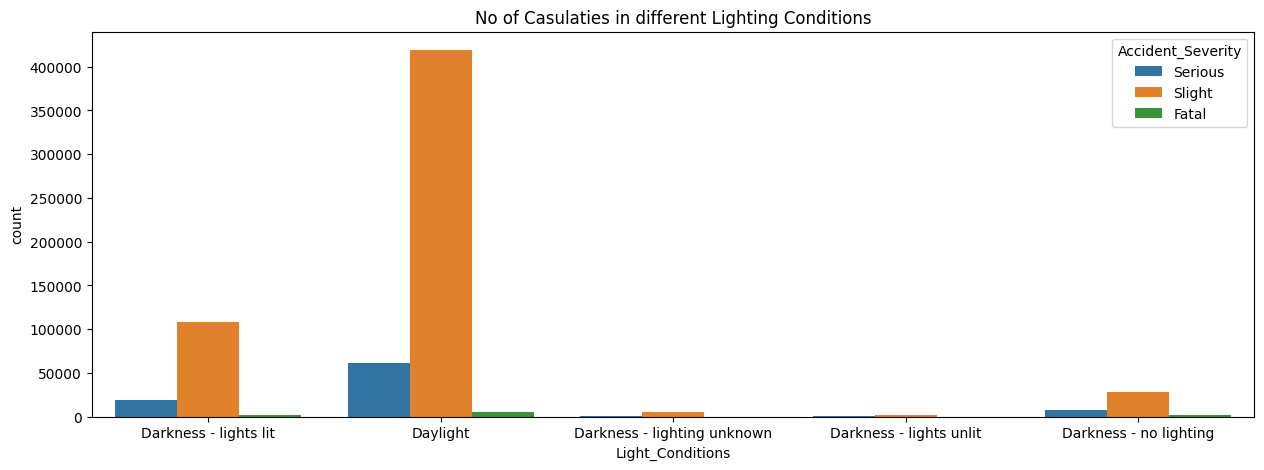

In [79]:
plt.figure(figsize=(15,5))
plt.title('No of Casulaties in different Lighting Conditions')
sns.countplot(x=df['Light_Conditions'],hue=df['Accident_Severity'])
#Accident occur more in day light

<Axes: title={'center': 'No of Casulaties in different Weather Conditions'}, xlabel='Weather_Conditions', ylabel='count'>

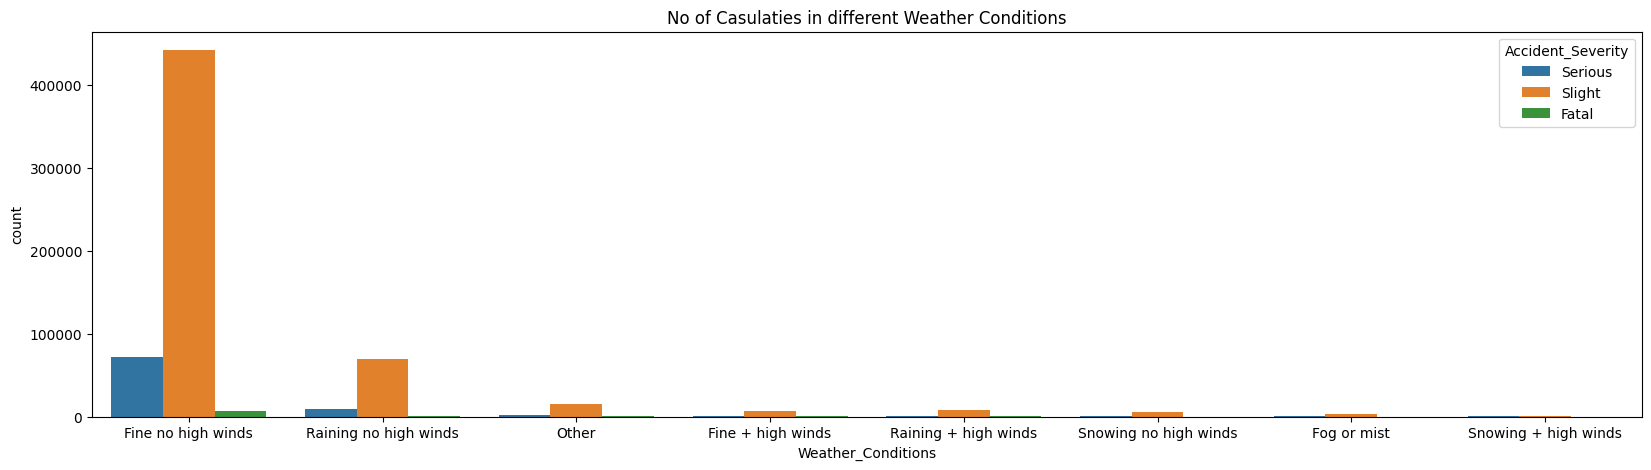

In [80]:
plt.figure(figsize=(20,5))
plt.title('No of Casulaties in different Weather Conditions')
sns.countplot(x=df['Weather_Conditions'],hue=df['Accident_Severity'])
#Normal Weather has more accident

<Axes: title={'center': 'No of Casulaties in different Road Types'}, xlabel='Road_Type', ylabel='count'>

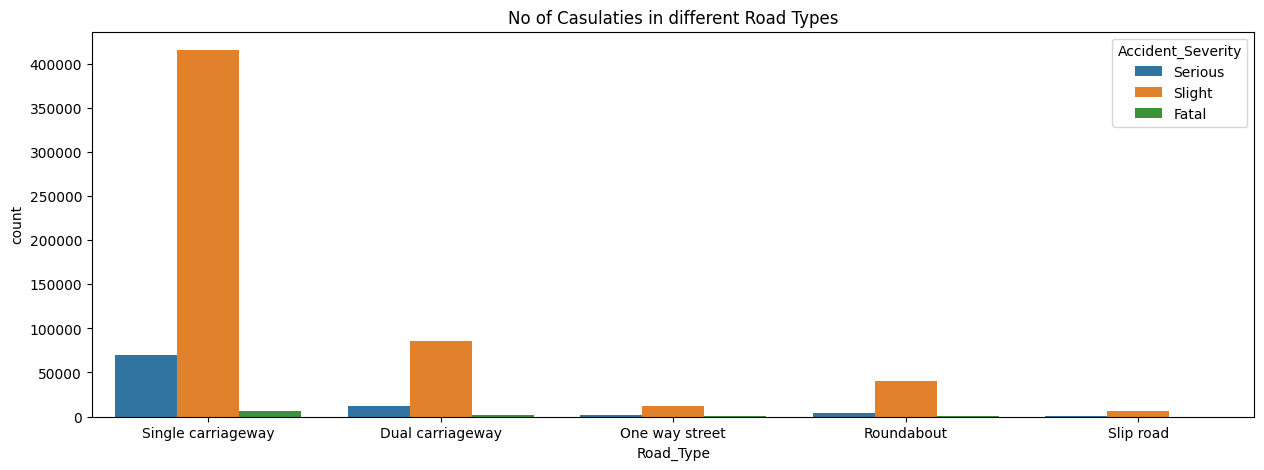

In [81]:
plt.figure(figsize=(15,5))
plt.title('No of Casulaties in different Road Types')
sns.countplot(x=df['Road_Type'],hue=df['Accident_Severity'])
#Single Carriageway has more chances of accident

<Axes: title={'center': 'No of Casulaties in different Road Surface Conditions'}, xlabel='Road_Surface_Conditions', ylabel='count'>

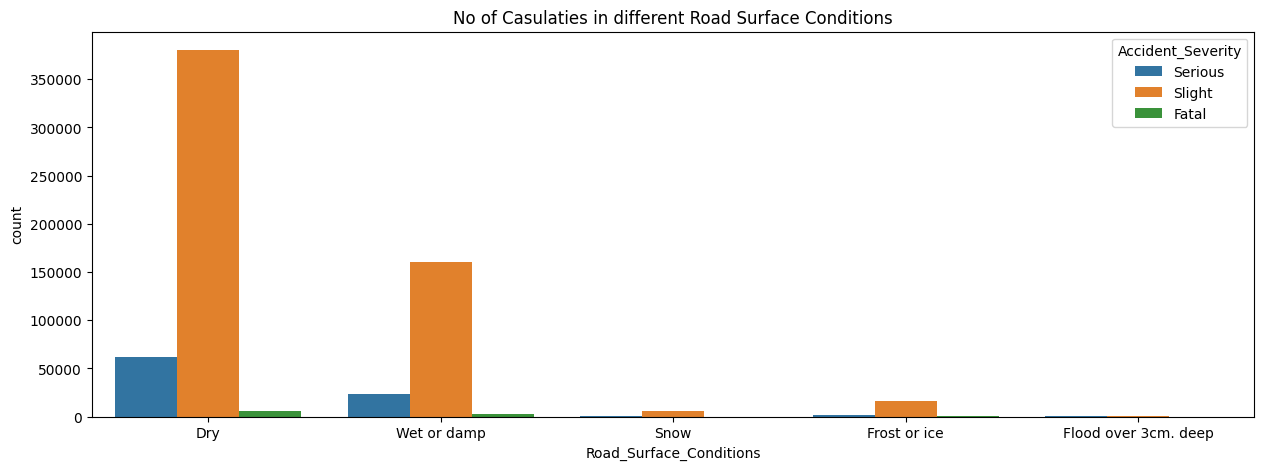

In [82]:
plt.figure(figsize=(15,5))
plt.title('No of Casulaties in different Road Surface Conditions')
sns.countplot(x=df['Road_Surface_Conditions'],hue=df['Accident_Severity'])
#Dry Normal Road has more accident

<Axes: title={'center': 'No of Casulaties in different Population Area'}, xlabel='Urban_or_Rural_Area', ylabel='count'>

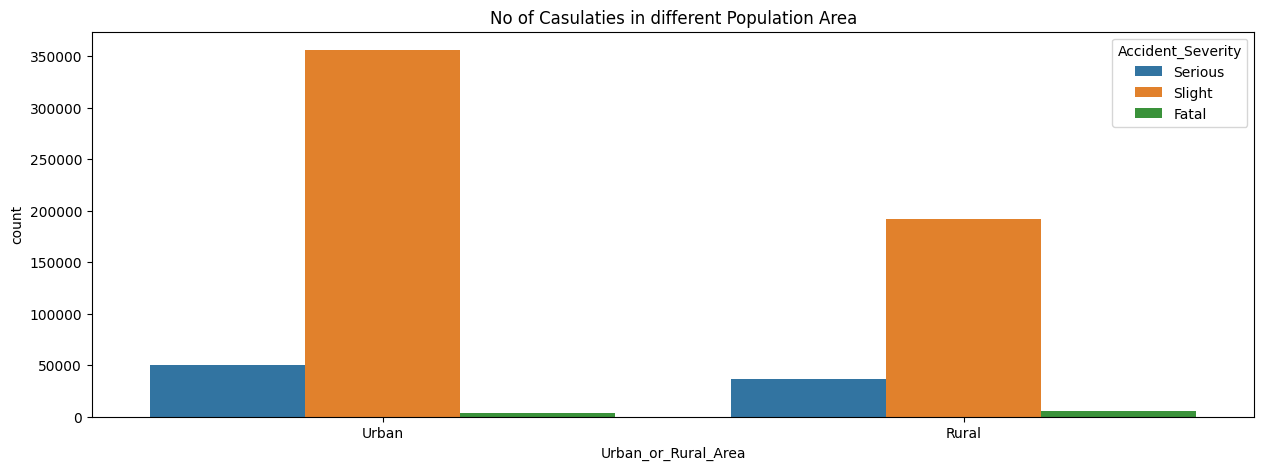

In [83]:
plt.figure(figsize=(15,5))
plt.title('No of Casulaties in different Population Area')
sns.countplot(x=df_copy['Urban_or_Rural_Area'],hue=df['Accident_Severity'])
#Urban Area has more accident

<Axes: title={'center': 'No of Casulaties in different Vehicles'}, xlabel='Vehicle_Type', ylabel='count'>

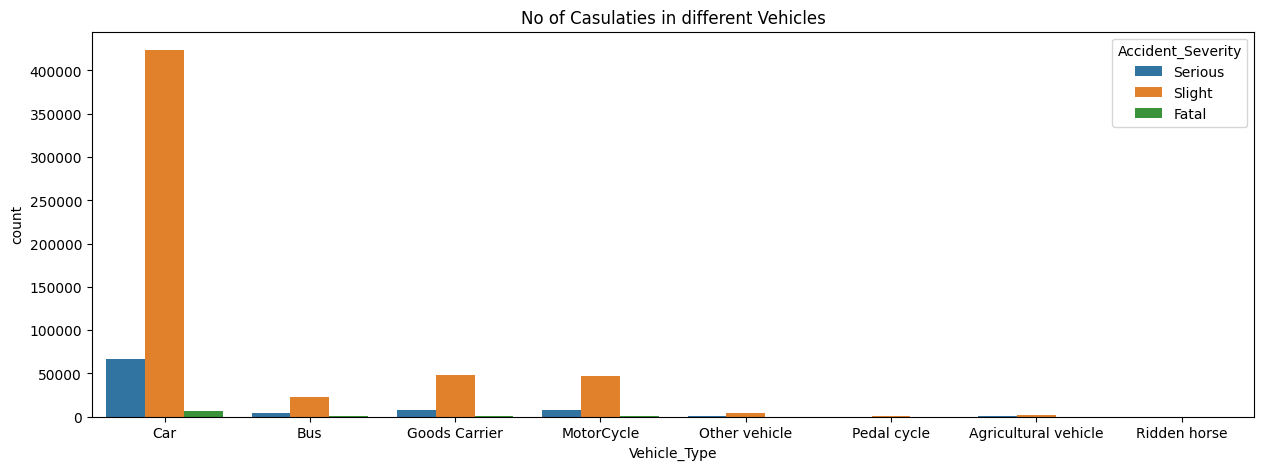

In [84]:
plt.figure(figsize=(15,5))
plt.title('No of Casulaties in different Vehicles')
sns.countplot(x=df_copy['Vehicle_Type'],hue=df['Accident_Severity'])
#Car has more accident 

<Axes: xlabel='Accident_Year', ylabel='count'>

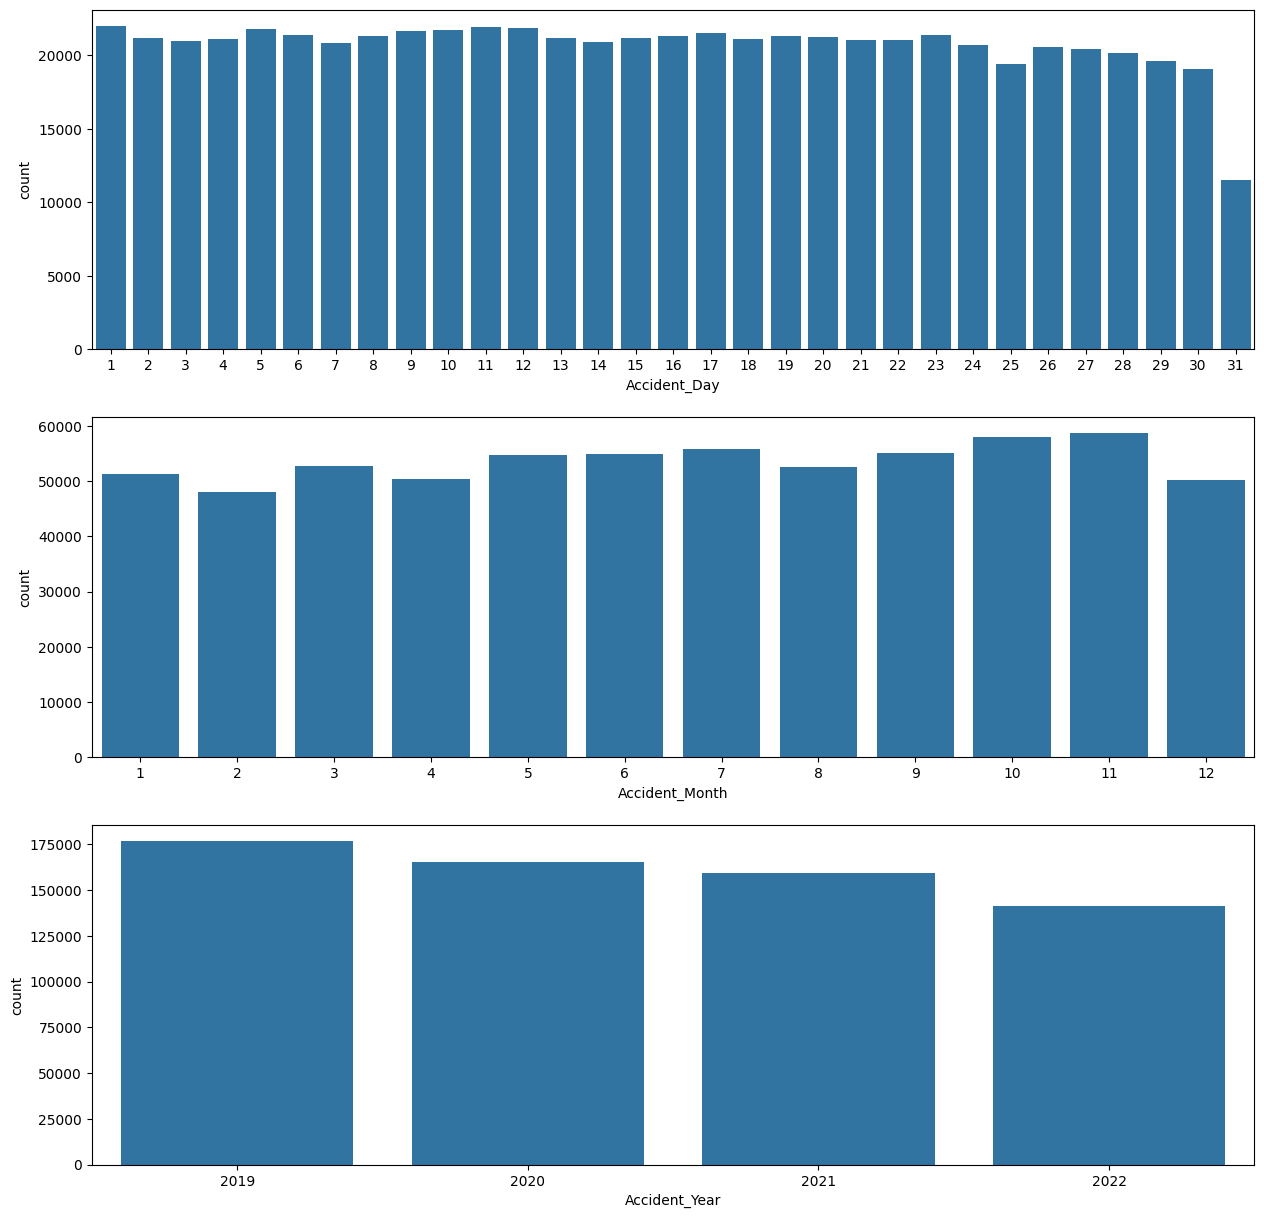

In [85]:
fig, axes = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.countplot(x=df_copy['Accident_Day'], ax=axes[0])
sns.countplot(x=df_copy['Accident_Month'], ax=axes[1])
sns.countplot(x=df_copy['Accident_Year'], ax=axes[2])

In [86]:
#Dropping Unwanted Columns
df_copy.drop(['Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type','Accident Date','District Area','Light_Conditions','Visibility'],axis=1,inplace=True)

In [87]:

Na(df_copy)

________________________
0 - Null Values of Accident_Severity
The Null Percentage of Accident_Severity is 0.00%

________________________
0 - Null Values of Latitude
The Null Percentage of Latitude is 0.00%

________________________
0 - Null Values of Longitude
The Null Percentage of Longitude is 0.00%

________________________
0 - Null Values of Number_of_Casualties
The Null Percentage of Number_of_Casualties is 0.00%

________________________
0 - Null Values of Number_of_Vehicles
The Null Percentage of Number_of_Vehicles is 0.00%

________________________
0 - Null Values of Light_Conditions_Darkness_Lights_Unknown
The Null Percentage of Light_Conditions_Darkness_Lights_Unknown is 0.00%

________________________
0 - Null Values of Light_Conditions_Darkness_Lights_off
The Null Percentage of Light_Conditions_Darkness_Lights_off is 0.00%

________________________
0 - Null Values of Light_Conditions_Darkness_Lights_on
The Null Percentage of Light_Conditions_Darkness_Lights_on is 0.00%

__

In [88]:
df_copy.to_csv("Data\Accident_Data_Cleaned.csv",index=False)

In [89]:
df_model = pd.read_csv('Data/Accident_Data_Cleaned.csv').sample(n=1000,random_state =44)

In [90]:
df_model.head()

,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Light_Conditions_Darkness_Lights_Unknown,Light_Conditions_Darkness_Lights_off,Light_Conditions_Darkness_Lights_on,Light_Conditions_Darkness_no_Lights,Light_Conditions_Daylight,...,Accident_Month,Accident_Year,Vehicle_Type_Agricultural vehicle,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Goods Carrier,Vehicle_Type_MotorCycle,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse
525989,2,54.66,-3.44,2,2,0.00,0.00,0.00,0.00,1.00,...,5,2022,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
505675,2,51.48,-0.21,1,2,0.00,0.00,0.00,0.00,1.00,...,6,2022,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
187805,2,51.47,-0.06,1,2,0.00,0.00,0.00,0.00,1.00,...,8,2020,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
177647,1,51.51,-0.09,1,2,0.00,0.00,0.00,0.00,1.00,...,8,2020,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
340970,2,55.76,-3.86,1,2,0.00,0.00,0.00,0.00,1.00,...,4,2020,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [91]:
x = df_model.drop(['Accident_Severity'],axis=1)
y= df_model['Accident_Severity']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=44)

In [93]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_train = stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

In [94]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score

In [95]:
models={
    
    "Logistic":LogisticRegression(),
    "Xgboost":XGBClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    #model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    #model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    #model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
   # model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    #model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    #model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    #print('- Precision: {:.4f}'.format(model_train_precision))
    #print('- Recall: {:.4f}'.format(model_train_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    #print('- Precision: {:.4f}'.format(model_test_precision))
    #print('- Recall: {:.4f}'.format(model_test_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic
Model performance for Training set
- Accuracy: 0.8643
- F1 score: 0.8064
----------------------------------
Model performance for Test set
- Accuracy: 0.8067
- F1 score: 0.7293


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7900
- F1 score: 0.7435


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7567
- F1 score: 0.7455


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8133
- F1 score: 0.7326


Gradient Boost
Model performance for Training set
- Accuracy: 0.9429
- F1 score: 0.9354
----------------------------------
Model performance for Test set
- Accuracy: 0.7767
- F1 score: 0.7140


Adaboost
Model performance for Training set
-

In [96]:
## Hyperparameter Training
rf_params = {'criterion':['gini','entropy', 'log_loss'],
             "max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]
            }
xgboost_params = {"learning_rate": [0.1, 0.01,1.0,10,100],
                  "max_depth": [5, 8, 12, 20, 30,40,50],
                  "n_estimators": [100, 200, 300,400,500],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}
adaboost_param={
                    "learning_rate": [0.1, 0.01,1.0,10,100],
                    "n_estimators":[50,60,70,80,90],
                    "algorithm":['SAMME','SAMME.R']}

gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10],
              "learning_rate": [0.1, 0.01,1.0,10,100]}
dtparam={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}


In [97]:
# Models list for Hyperparameter tuning
cv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
               #     ("Xgboost", XGBClassifier(), xgboost_params),
                    ("GradientBoost", GradientBoostingClassifier(), gradient_params),
                    ("Adaboost",AdaBoostClassifier(),adaboost_param),
                    # ("DT",DecisionTreeClassifier(),dtparam)
    
                   
                   ]

In [98]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in cv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 15, 'criterion': 'entropy'}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 5, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [99]:
#Random CV
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=20,max_features=7,max_depth=8,criterion= 'gini'),
    "Xgboost":XGBClassifier(n_estimators=400,max_depth=12,learning_rate=0.1,colsample_bytree=0.5),
    "Gradient Boost":GradientBoostingClassifier(n_estimators= 100, min_samples_split= 20, max_depth= 15, loss='log_loss', criterion ='friedman_mse',learning_rate= 0.01),
    "Adaboost": AdaBoostClassifier(n_estimators= 50, algorithm= 'SAMME',learning_rate=0.1),
    # "Decision Tree":DecisionTreeClassifier(splitter='random', max_features='sqrt', max_depth= 3, criterion= 'log_loss')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    


    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))


    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8600
- F1 score: 0.7967
----------------------------------
Model performance for Test set
- Accuracy: 0.8167
- F1 score: 0.7343


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8033
- F1 score: 0.7384


Gradient Boost
Model performance for Training set
- Accuracy: 0.9271
- F1 score: 0.9148
----------------------------------
Model performance for Test set
- Accuracy: 0.7967
- F1 score: 0.7242


Adaboost
Model performance for Training set
- Accuracy: 0.8586
- F1 score: 0.7932
----------------------------------
Model performance for Test set
- Accuracy: 0.8167
- F1 score: 0.7343




In [100]:
from sklearn.model_selection import GridSearchCV
model_param = {}
for name, model, params in cv_models:
    random = GridSearchCV(estimator=model,
                                   param_grid=params,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Fitting 3 folds for each of 2700 candidates, totalling 8100 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
---------------- Best Params for RF -------------------
{'criterion': 'gini', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}
---------------- Best Params for GradientBoost -------------------
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 100}
---------------- Best Params for Adaboost -------------------
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


In [101]:
#Grid CV
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=7,max_depth=8,criterion= 'entropy'),
    "Xgboost":XGBClassifier(n_estimators=400,max_depth=12,learning_rate=0.1,colsample_bytree=0.5),
    "Gradient Boost":GradientBoostingClassifier(n_estimators= 100, min_samples_split= 15, max_depth= 10, loss='log_loss', criterion ='friedman_mse',learning_rate=0.01),
    "Adaboost": AdaBoostClassifier(n_estimators= 50, algorithm= 'SAMME',learning_rate=0.1),
    # "Decision Tree":DecisionTreeClassifier(splitter='best', max_features='sqrt', max_depth= 3, criterion= 'entropy')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score



    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    


    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))


    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8900
- F1 score: 0.8567
----------------------------------
Model performance for Test set
- Accuracy: 0.8167
- F1 score: 0.7343


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8033
- F1 score: 0.7384


Gradient Boost
Model performance for Training set
- Accuracy: 0.9100
- F1 score: 0.8908
----------------------------------
Model performance for Test set
- Accuracy: 0.7967
- F1 score: 0.7296


Adaboost
Model performance for Training set
- Accuracy: 0.8586
- F1 score: 0.7932
----------------------------------
Model performance for Test set
- Accuracy: 0.8167
- F1 score: 0.7343




Model General Testing
===================================

Logistic
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8567
- F1 score: 0.8012

===================================


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8433
- F1 score: 0.8070

===================================


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7833
- F1 score: 0.7880

===================================


Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
----------------------------------
Model performance for Test set
- Accuracy: 0.8600
- F1 score: 0.8014

===================================


Gradient Boost
Model performance for Training set
- Accuracy: 0.9214
- F1 score: 0.9042
----------------------------------
Model performance for Test set
- Accuracy: 0.8500
- F1 score: 0.8081

===================================


Adaboost
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8183
----------------------------------
Model performance for Test set
- Accuracy: 0.8567
- F1 score: 0.8054

===================================




GRID CV Hyperparameter Tuning

Random Forest
Model performance for Training set
- Accuracy: 0.8943
- F1 score: 0.8562
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8600
- F1 score: 0.8014

===================================


Gradient Boost
Model performance for Training set
- Accuracy: 0.9129
- F1 score: 0.8915
----------------------------------
Model performance for Test set
- Accuracy: 0.8433
- F1 score: 0.7981

===================================


Adaboost
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Decision Tree
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Random CV Hyperparameter Tuning

Random Forest
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8600
- F1 score: 0.8014

===================================


Gradient Boost
Model performance for Training set
- Accuracy: 0.9143
- F1 score: 0.8941
----------------------------------
Model performance for Test set
- Accuracy: 0.8433
- F1 score: 0.7944

===================================


Adaboost
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Decision Tree
Model performance for Training set
- Accuracy: 0.8757
- F1 score: 0.8191
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================

=========================================================================

Best Performing Model's with Following Parameters are -

"Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=7,max_depth=8,criterion= 'entropy'),

"Adaboost": AdaBoostClassifier(n_estimators= 50, algorithm= 'SAMME',learning_rate=0.1),

"Decision Tree":DecisionTreeClassifier(splitter='best', max_features='sqrt', max_depth= 3, criterion= 'entropy')

Random Forest
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================

Adaboost
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================


Decision Tree
Model performance for Training set
- Accuracy: 0.8743
- F1 score: 0.8156
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8048

===================================

Other Model Averaging Accuracy - ~86%


